# **RED NEURAL CONVOLUCIONAL**

Cargando el conjunto de datos MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma original de los datos de entrenamiento: (60000, 28, 28)
Forma original de las etiquetas de entrenamiento: (60000,)

Datos preprocesados:
Forma de x_train: (60000, 28, 28, 1)
Forma de y_train: (60000, 10)
Ejemplo de una etiqueta 'one-hot': [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Construyendo el modelo de la CNN...
Compilando el modelo...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando el entrenamiento...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 105ms/step - accuracy: 0.8156 - loss: 0.5922 - val_accuracy: 0.9808 - val_loss: 0.0622
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9683 - loss: 0.1105 - val_accuracy: 0.9866 - val_loss: 0.0395
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9777 - loss: 0.0766 - val_accuracy: 0.9877 - val_loss: 0.0373
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9822 - loss: 0.0592 - val_accuracy: 0.9892 - val_loss: 0.0314
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - accuracy: 0.9853 - loss: 0.0489 - val_accuracy: 0.9906 - val_loss: 0.0277
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.9883 - loss: 0.0410 - val_accuracy: 0.9902 - val_loss: 0.0261
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.9884 - loss: 0.0359 - val_accuracy: 0.9902 - val_loss: 0.0281
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/ste

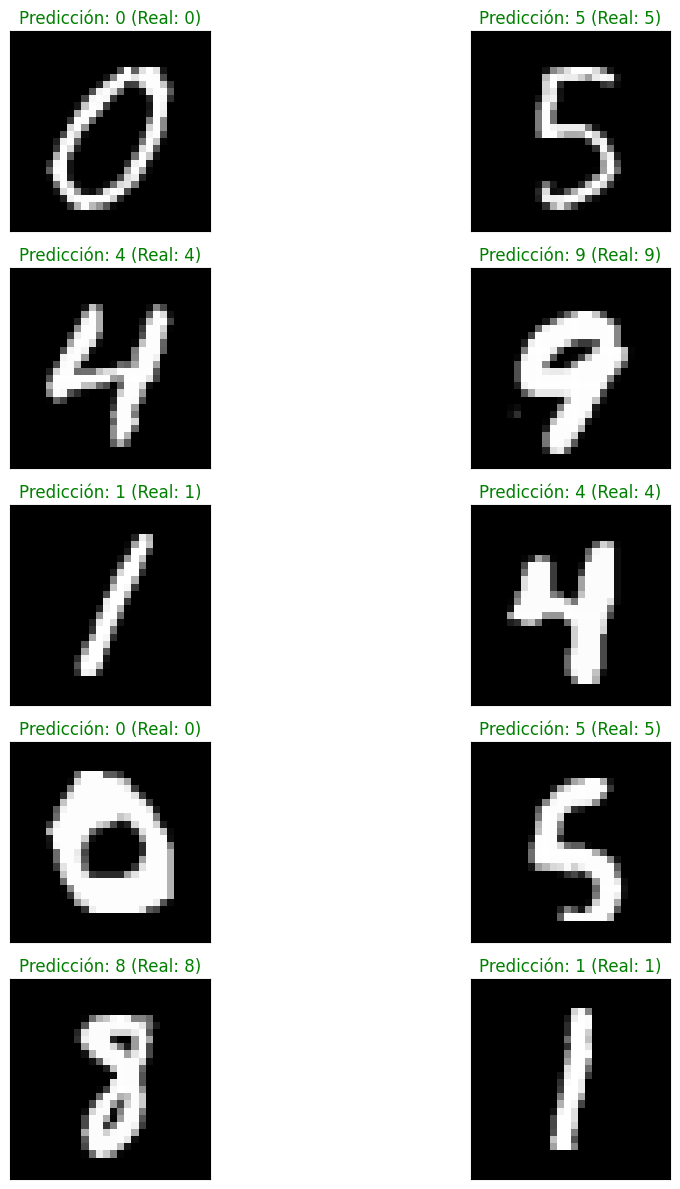

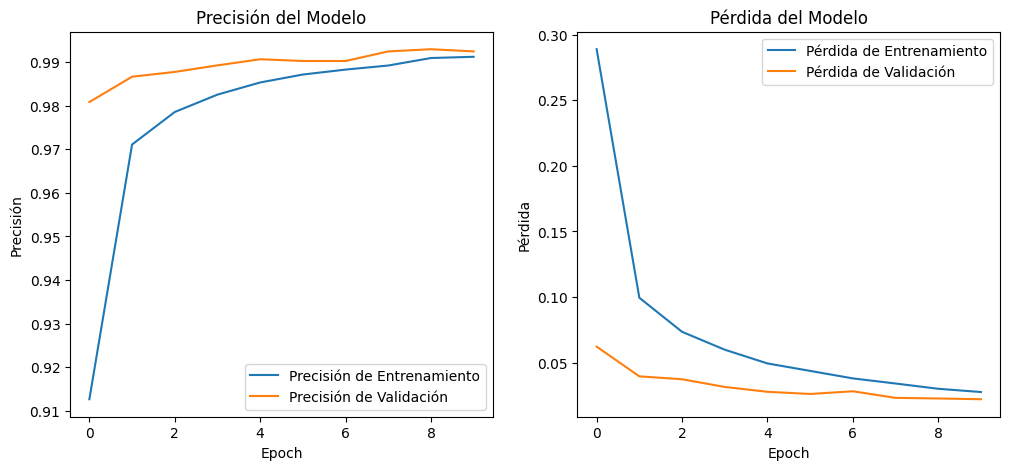

In [ ]:
# -*- coding: utf-8 -*-
"""
Ejercicio Práctico de Redes Neuronales Convolucionales (CNN)
-------------------------------------------------------------
Este script de Python construye y entrena una CNN simple para clasificar
imágenes de dígitos escritos a mano del conjunto de datos MNIST.
Es un ejemplo clásico y fundamental para entender la visión por computadora.

Librerías necesarias:
- tensorflow: El framework para construir y entrenar el modelo.
- numpy: Para operaciones numéricas eficientes.
- matplotlib: Para visualizar los datos y los resultados.

Puedes instalar todo con: pip install tensorflow numpy matplotlib
"""

# 1. IMPORTACIÓN DE LIBRERÍAS
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 2. CARGA Y PREPROCESAMIENTO DE LOS DATOS
print("Cargando el conjunto de datos MNIST...")

# El dataset MNIST viene incluido en Keras.
# Se divide automáticamente en datos de entrenamiento y de prueba.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Forma original de los datos de entrenamiento: {x_train.shape}")
print(f"Forma original de las etiquetas de entrenamiento: {y_train.shape}")

# Preprocesamiento de las imágenes:
# a. Añadir una dimensión para el "canal". Las CNNs esperan tensores de 4D:
#    (n_muestras, altura, anchura, canales). Como las imágenes son en escala de grises,
#    el canal es 1.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# b. Normalizar los valores de los píxeles. Los valores originales van de 0 a 255.
#    Al dividirlos por 255, los escalamos al rango [0, 1]. Esto ayuda al
#    modelo a aprender más rápido y de forma más estable.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Preprocesamiento de las etiquetas (las 'y'):
# Las etiquetas son números del 0 al 9. Para clasificación, es mejor usar
# el formato "one-hot encoding". Ejemplo: el número 5 se convierte en
# el vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0].
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("\nDatos preprocesados:")
print(f"Forma de x_train: {x_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Ejemplo de una etiqueta 'one-hot': {y_train[0]}")


# 3. CONSTRUCCIÓN DEL MODELO DE LA RED NEURONAL CONVOLUCIONAL (CNN)
print("\nConstruyendo el modelo de la CNN...")

# Usaremos un modelo 'Sequential', que es una pila lineal de capas.
model = Sequential()

# ---- CAPA 1: CONVOLUCIÓN + POOLING ----
# Conv2D: La primera capa convolucional. Es el corazón de la CNN.
# - 32: Número de filtros (o kernels). Cada filtro aprenderá a detectar un patrón
#       diferente (bordes, texturas, etc.).
# - kernel_size=(3,3): El tamaño de cada filtro (una ventana de 3x3 píxeles).
# - activation='relu': La función de activación. 'ReLU' es muy común y eficiente.
# - input_shape: La forma de una sola imagen de entrada. Solo se necesita en la primera capa.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# MaxPooling2D: Esta capa reduce el tamaño de la imagen (downsampling).
# Se queda con el valor máximo de cada ventana 2x2. Esto ayuda a que el modelo
# sea más robusto a pequeñas traslaciones del dígito en la imagen.
model.add(MaxPooling2D(pool_size=(2, 2)))

# ---- CAPA 2: CONVOLUCIÓN + POOLING ----
# Añadimos otra capa convolucional para aprender patrones más complejos
# a partir de los patrones simples detectados por la primera capa.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ---- CAPA 3: APLANADO (FLATTEN) Y CAPAS DENSAS ----
# Flatten: Convierte el mapa de características 2D resultante en un vector 1D.
# Esto es necesario para conectar las capas convolucionales con las capas densas (tradicionales).
model.add(Flatten())

# Dense: Una capa de neuronas totalmente conectada.
# - 128: Número de neuronas en esta capa.
# - activation='relu': Función de activación.
model.add(Dense(128, activation='relu'))

# Dropout: Es una técnica de regularización para prevenir el sobreajuste (overfitting).
# "Apaga" aleatoriamente el 50% de las neuronas durante el entrenamiento para
# que la red no dependa demasiado de unas pocas neuronas.
model.add(Dropout(0.5))

# ---- CAPA DE SALIDA ----
# Dense: La capa final que dará la clasificación.
# - 10: Número de neuronas, una para cada clase (dígitos del 0 al 9).
# - activation='softmax': Esta función convierte las salidas en un vector de
#   probabilidades, donde la suma de todas las probabilidades es 1. La neurona
#   con la probabilidad más alta será la predicción del modelo.
model.add(Dense(10, activation='softmax'))


# 4. COMPILACIÓN DEL MODELO
print("Compilando el modelo...")

# Antes de entrenar, debemos configurar el proceso de aprendizaje.
model.compile(optimizer='adam',                # Optimizador: 'adam' es un buen punto de partida.
              loss='categorical_crossentropy', # Función de pérdida: Adecuada para clasificación multiclase.
              metrics=['accuracy'])            # Métrica: Queremos monitorear la precisión.

# Mostramos un resumen de la arquitectura del modelo.
model.summary()


# 5. ENTRENAMIENTO DEL MODELO
print("\nIniciando el entrenamiento...")

# Usamos el método `fit` para entrenar el modelo.
# - x_train, y_train: Datos de entrenamiento.
# - batch_size: Número de muestras a procesar antes de actualizar los pesos.
# - epochs: Número de veces que el modelo verá el conjunto de datos completo.
# - validation_data: Datos que se usan para evaluar el modelo al final de cada epoch.
#   Esto nos permite ver si el modelo está generalizando bien a datos no vistos.
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

print("Entrenamiento finalizado.")


# 6. EVALUACIÓN DEL MODELO
print("\nEvaluando el modelo con los datos de prueba...")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Pérdida en el conjunto de prueba: {score[0]:.4f}')
print(f'Precisión en el conjunto de prueba: {score[1]:.4f}')


# 7. VISUALIZACIÓN DE PREDICCIONES
print("\nRealizando algunas predicciones...")

# Hacemos predicciones sobre todo el conjunto de prueba.
predictions = model.predict(x_test)

# Mostramos 10 ejemplos al azar.
plt.figure(figsize=(12, 12))
for i in range(10):
    # Elegimos un índice aleatorio.
    idx = np.random.randint(0, x_test.shape[0])

    plt.subplot(5, 2, i + 1)
    # Mostramos la imagen original.
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')

    # Obtenemos la predicción y la etiqueta real.
    predicted_label = np.argmax(predictions[idx])
    true_label = np.argmax(y_test[idx])

    # Ponemos un título con la predicción.
    # El color será verde si es correcta, rojo si es incorrecta.
    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Predicción: {predicted_label} (Real: {true_label})", color=title_color)

    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# Opcional: Graficar la precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend()
plt.show()